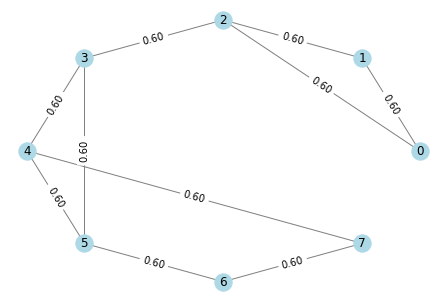

tensor(7.2000)
[[ 1.2       -0.6       -0.6       -0.        -0.        -0.
  -0.        -0.       ]
 [-0.6        1.2       -0.6       -0.        -0.        -0.
  -0.        -0.       ]
 [-0.6       -0.6        1.8000001 -0.6       -0.        -0.
  -0.        -0.       ]
 [-0.        -0.        -0.6        1.8000001 -0.6       -0.6
  -0.        -0.       ]
 [-0.        -0.        -0.        -0.6        1.8000001 -0.6
  -0.        -0.6      ]
 [-0.        -0.        -0.        -0.6       -0.6        1.8000001
  -0.6       -0.       ]
 [-0.        -0.        -0.        -0.        -0.        -0.6
   1.2       -0.6      ]
 [-0.        -0.        -0.        -0.        -0.6       -0.
  -0.6        1.2      ]]


In [1]:
from GEM_module import GEM
from utils import *
from scipy.sparse.csgraph import laplacian

# seed
torch.manual_seed(42)
torch.random.manual_seed(42)

import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"


# generate synthetic data
edges = [[0,1],[0,2],[1,2],[2,3],[3,4],[4,5],[3,5],[5,6],[6,7], [4,7]]
edges = torch.tensor(edges)
weights = torch.tensor([0.6]*len(edges))
num_nodes = 8
adj = generate_graph_from_edges(num_nodes, edges, weights)
print(adj.norm()**2)
L = laplacian(adj, normed=False)
print(L)
# generate data
sigma = 0.4
mu = sigma ** 2
n = 128
y = generate_y(num_nodes, sigma, L, n)

In [2]:
def Experiment(arg_dict, num_node, S_init=None, seed=42):
    mu = arg_dict['mu']
    gamma = arg_dict['gamma']
    step_size = arg_dict['step_size']
    PGD_step_size = arg_dict['PGD_step_size']
    c = arg_dict['c']
    PGD_iters = arg_dict['PGD_iters']
    use_block_coordinate = arg_dict['use_block_coordinate']
    torch.manual_seed(seed)
    torch.random.manual_seed(seed)
    gem = GEM(num_nodes, mu=mu, gamma=gamma, step_size=step_size, c=c, PGD_iters=PGD_iters, PGD_step_size=PGD_step_size, use_block_coordinate=use_block_coordinate, scale=True)
    torch.manual_seed(42)
    # initialize adjacency and S
    # adj_init = torch.ones((num_nodes, num_nodes)) - torch.eye(num_nodes)  # all-one matrix with zero diagonal
    if S_init is None:
        S_init = torch.ones((num_nodes, num_nodes)) - torch.eye(num_nodes)  # all-one matrix with zero diagonal
 
    x_final, adj_final, S_final = gem(y, S_init, num_iters=5)
    W_final = adj_final * S_final
    print("Final learned adjacency matrix:")
    print(W_final, W_final.norm()**2)

# 6-node graph experiments - PGD (w/o BCD)
Settings: All random seed 42. 128 data points. Generating noise $\sigma=0.4$ (variance 0.16).

Testing parameters:
- GLR strength: $\mu=0.2, 0.1, 0.4$ (suitable, low, high)
- PGD step size $\eta=0.01, 0.02$ combined with iterations $N=100, 50$
- Sparsity control $\gamma=0.4, 0.2, 0.6$



Iteration 1/5
after E-step: delta_W norm 0.1936, GLR 13.1463, adj norm^2 16.4253
after M-step-1: delta_W norm 0.0079, GLR 11.6977, adj norm^2 16.4743
Block Coordinate PGD iter 1/50, ||S_new - S||_F = 0.1633
Block Coordinate PGD iter 21/50, ||S_new - S||_F = 0.0210
Block Coordinate PGD iter 41/50, ||S_new - S||_F = 0.0099
tensor([[0.0000, 1.0000, 1.0000, 0.8276, 0.7190, 0.7530, 0.6516, 0.6660],
        [1.0000, 0.0000, 1.0000, 0.6387, 0.8126, 0.5318, 0.7046, 0.7095],
        [1.0000, 1.0000, 0.0000, 0.8088, 0.9139, 0.8820, 0.4738, 0.7105],
        [0.8276, 0.6387, 0.8088, 0.0000, 1.0000, 1.0000, 0.8690, 0.5975],
        [0.7190, 0.8126, 0.9139, 1.0000, 0.0000, 0.7461, 1.0000, 0.9408],
        [0.7530, 0.5318, 0.8820, 1.0000, 0.7461, 0.0000, 0.8758, 0.7876],
        [0.6516, 0.7046, 0.4738, 0.8690, 1.0000, 0.8758, 0.0000, 1.0000],
        [0.6660, 0.7095, 0.7105, 0.5975, 0.9408, 0.7876, 1.0000, 0.0000]],
       grad_fn=<IndexPutBackward0>)
W norm^2 at Iteration 1 tensor(5.5373, grad_fn=<

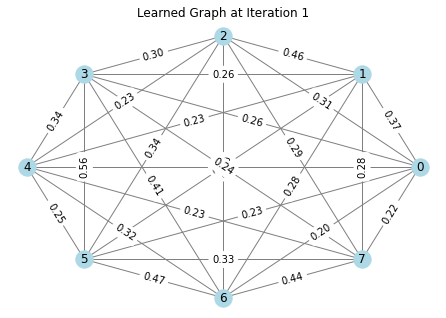

Iteration 2/5
after E-step: delta_W norm 0.0189, GLR 10.4938, adj norm^2 16.3025
after M-step-1: delta_W norm 0.0044, GLR 11.4772, adj norm^2 16.2817
Block Coordinate PGD iter 1/50, ||S_new - S||_F = 0.2132
Block Coordinate PGD iter 21/50, ||S_new - S||_F = 0.0303
Block Coordinate PGD iter 41/50, ||S_new - S||_F = 0.0190
tensor([[0.0000, 1.0000, 0.9850, 0.5598, 0.7855, 0.8080, 0.4676, 0.6536],
        [1.0000, 0.0000, 1.0000, 0.9639, 0.6377, 0.3241, 0.3322, 0.8142],
        [0.9850, 1.0000, 0.0000, 0.8744, 0.8115, 0.8278, 0.9202, 0.1164],
        [0.5598, 0.9639, 0.8744, 0.0000, 0.7231, 0.6825, 0.6717, 0.8539],
        [0.7855, 0.6377, 0.8115, 0.7231, 0.0000, 1.0000, 0.7565, 1.0000],
        [0.8080, 0.3241, 0.8278, 0.6825, 1.0000, 0.0000, 1.0000, 1.0000],
        [0.4676, 0.3322, 0.9202, 0.6717, 0.7565, 1.0000, 0.0000, 0.8951],
        [0.6536, 0.8142, 0.1164, 0.8539, 1.0000, 1.0000, 0.8951, 0.0000]],
       grad_fn=<IndexPutBackward0>)
W norm^2 at Iteration 2 tensor(7.4907, grad_fn=<

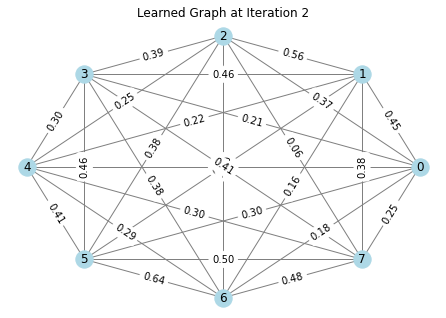

Iteration 3/5
after E-step: delta_W norm 0.0144, GLR 11.1526, adj norm^2 16.1257
after M-step-1: delta_W norm 0.0083, GLR 10.2158, adj norm^2 16.1037
Block Coordinate PGD iter 1/50, ||S_new - S||_F = 0.2596
Block Coordinate PGD iter 21/50, ||S_new - S||_F = 0.0275
Block Coordinate PGD iter 41/50, ||S_new - S||_F = 0.0164
tensor([[0.0000, 1.0000, 1.0000, 0.6275, 0.8317, 0.7280, 0.5566, 0.4437],
        [1.0000, 0.0000, 1.0000, 0.4779, 0.4970, 0.5939, 0.6182, 0.6488],
        [1.0000, 1.0000, 0.0000, 0.9750, 0.9452, 0.2887, 0.5728, 0.6045],
        [0.6275, 0.4779, 0.9750, 0.0000, 0.7309, 1.0000, 0.4641, 1.0000],
        [0.8317, 0.4970, 0.9452, 0.7309, 0.0000, 0.7483, 1.0000, 0.8016],
        [0.7280, 0.5939, 0.2887, 1.0000, 0.7483, 0.0000, 1.0000, 0.7933],
        [0.5566, 0.6182, 0.5728, 0.4641, 1.0000, 1.0000, 0.0000, 0.8336],
        [0.4437, 0.6488, 0.6045, 1.0000, 0.8016, 0.7933, 0.8336, 0.0000]],
       grad_fn=<IndexPutBackward0>)
W norm^2 at Iteration 3 tensor(7.6319, grad_fn=<

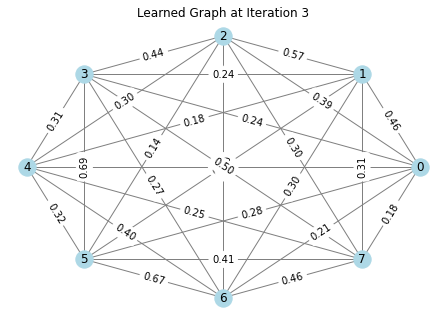

Iteration 4/5
after E-step: delta_W norm 0.0109, GLR 12.3495, adj norm^2 16.1239
after M-step-1: delta_W norm 0.0038, GLR 10.8817, adj norm^2 16.0557
Block Coordinate PGD iter 1/50, ||S_new - S||_F = 0.2582
Block Coordinate PGD iter 21/50, ||S_new - S||_F = 0.0228
Block Coordinate PGD iter 41/50, ||S_new - S||_F = 0.0114
tensor([[0.0000, 1.0000, 0.7686, 0.7852, 0.8683, 0.6456, 0.3949, 0.6078],
        [1.0000, 0.0000, 0.9358, 0.4987, 0.7408, 0.3120, 0.6995, 0.4690],
        [0.7686, 0.9358, 0.0000, 0.8035, 0.6149, 0.7423, 0.5956, 0.5812],
        [0.7852, 0.4987, 0.8035, 0.0000, 0.8042, 1.0000, 0.6992, 0.6567],
        [0.8683, 0.7408, 0.6149, 0.8042, 0.0000, 1.0000, 0.8560, 0.7943],
        [0.6456, 0.3120, 0.7423, 1.0000, 1.0000, 0.0000, 1.0000, 0.8182],
        [0.3949, 0.6995, 0.5956, 0.6992, 0.8560, 1.0000, 0.0000, 0.8719],
        [0.6078, 0.4690, 0.5812, 0.6567, 0.7943, 0.8182, 0.8719, 0.0000]],
       grad_fn=<IndexPutBackward0>)
W norm^2 at Iteration 4 tensor(7.8232, grad_fn=<

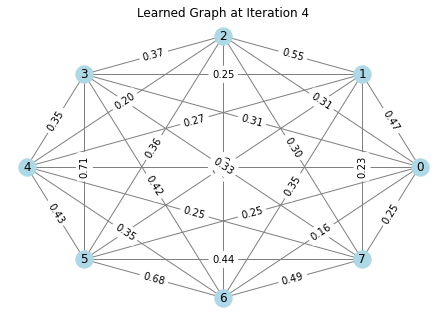

Iteration 5/5
after E-step: delta_W norm 0.0116, GLR 11.0383, adj norm^2 16.1463
after M-step-1: delta_W norm 0.0049, GLR 10.8906, adj norm^2 16.0940
Block Coordinate PGD iter 1/50, ||S_new - S||_F = 0.2637
Block Coordinate PGD iter 21/50, ||S_new - S||_F = 0.0269
Block Coordinate PGD iter 41/50, ||S_new - S||_F = 0.0188
tensor([[0.0000, 1.0000, 1.0000, 0.8020, 0.6920, 0.4904, 0.3802, 0.7519],
        [1.0000, 0.0000, 1.0000, 0.6371, 0.8881, 0.3826, 0.7432, 0.2180],
        [1.0000, 1.0000, 0.0000, 0.5288, 0.6061, 0.9784, 0.5458, 0.5204],
        [0.8020, 0.6371, 0.5288, 0.0000, 0.7853, 0.6012, 0.9265, 1.0000],
        [0.6920, 0.8881, 0.6061, 0.7853, 0.0000, 1.0000, 0.7764, 1.0000],
        [0.4904, 0.3826, 0.9784, 0.6012, 1.0000, 0.0000, 1.0000, 0.7317],
        [0.3802, 0.7432, 0.5458, 0.9265, 0.7764, 1.0000, 0.0000, 0.9998],
        [0.7519, 0.2180, 0.5204, 1.0000, 1.0000, 0.7317, 0.9998, 0.0000]],
       grad_fn=<IndexPutBackward0>)
W norm^2 at Iteration 5 tensor(8.3030, grad_fn=<

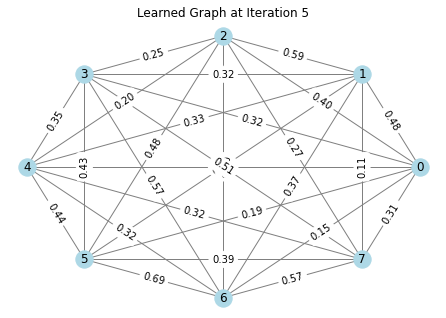

Final learned adjacency matrix:
tensor([[0.0000, 0.4784, 0.4004, 0.3203, 0.1813, 0.1912, 0.1524, 0.3103],
        [0.4784, 0.0000, 0.5898, 0.3228, 0.3301, 0.1874, 0.3733, 0.1072],
        [0.4004, 0.5898, 0.0000, 0.2481, 0.1993, 0.4753, 0.2633, 0.2701],
        [0.3203, 0.3228, 0.2481, 0.0000, 0.3472, 0.4313, 0.5687, 0.5136],
        [0.1813, 0.3301, 0.1993, 0.3472, 0.0000, 0.4383, 0.3217, 0.3242],
        [0.1912, 0.1874, 0.4753, 0.4313, 0.4383, 0.0000, 0.6916, 0.3945],
        [0.1524, 0.3733, 0.2633, 0.5687, 0.3217, 0.6916, 0.0000, 0.5709],
        [0.3103, 0.1072, 0.2701, 0.5136, 0.3242, 0.3945, 0.5709, 0.0000]],
       grad_fn=<MulBackward0>) tensor(8.3030, grad_fn=<PowBackward0>)


In [35]:
arg_dict = {
    'mu': 0.2,
    'gamma': 0.1,
    'step_size': 0.01,
    'c': 8,
    'PGD_iters': 50,
    'use_block_coordinate': True,
    'PGD_step_size': 0.1
}
Experiment(arg_dict, num_nodes, S_init=None, seed=2)

Iteration 1/5
after E-step: delta_W norm 0.1010, GLR 8.4903, adj norm^2 7.2003
after M-step-1: delta_W norm 0.1714, GLR 7.4323, adj norm^2 7.4225
PGD iter 1/50, ||S_new - S||_F = 0.1236
PGD iter 21/50, ||S_new - S||_F = 0.0979
PGD iter 41/50, ||S_new - S||_F = 0.0445
tensor([[0.0000, 0.5760, 0.2728, 0.2669, 0.0267, 0.1648],
        [0.5760, 0.0000, 0.1661, 0.1140, 0.1695, 0.1548],
        [0.2728, 0.1661, 0.0000, 0.4071, 0.4263, 0.3367],
        [0.2669, 0.1140, 0.4071, 0.0000, 0.4230, 0.4622],
        [0.0267, 0.1695, 0.4263, 0.4230, 0.0000, 0.2016],
        [0.1648, 0.1548, 0.3367, 0.4622, 0.2016, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 1 tensor(0.5526, grad_fn=<PowBackward0>)


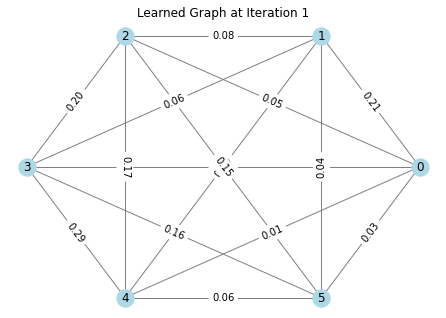

Iteration 2/5
after E-step: delta_W norm 0.1349, GLR 6.9936, adj norm^2 6.9911
after M-step-1: delta_W norm 0.1129, GLR 7.3980, adj norm^2 6.6555
PGD iter 1/50, ||S_new - S||_F = 0.2514
PGD iter 21/50, ||S_new - S||_F = 0.0938
PGD iter 41/50, ||S_new - S||_F = 0.0126
tensor([[0.0000, 0.3467, 0.3545, 0.0000, -0.0000, 0.0480],
        [0.3467, 0.0000, 0.2175, 0.0593, 0.0912, 0.0000],
        [0.3545, 0.2175, 0.0000, 0.4603, 0.5092, 0.1743],
        [0.0000, 0.0593, 0.4603, 0.0000, 0.1439, 0.2187],
        [-0.0000, 0.0912, 0.5092, 0.1439, 0.0000, 0.0417],
        [0.0480, 0.0000, 0.1743, 0.2187, 0.0417, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 2 tensor(2.7472, grad_fn=<PowBackward0>)


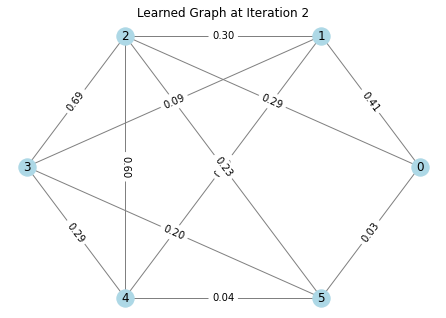

Iteration 3/5
after E-step: delta_W norm 0.1207, GLR 6.3681, adj norm^2 6.8123
after M-step-1: delta_W norm 0.0476, GLR 7.7507, adj norm^2 6.3526
PGD iter 1/50, ||S_new - S||_F = 0.3804
PGD iter 21/50, ||S_new - S||_F = 0.0409
PGD iter 41/50, ||S_new - S||_F = 0.0063
tensor([[0.0000, 0.1618, 0.4142, -0.0000, 0.0000, 0.0000],
        [0.1618, 0.0000, 0.2279, -0.0000, 0.0729, -0.0000],
        [0.4142, 0.2279, 0.0000, 0.2216, 0.0000, 0.1354],
        [-0.0000, -0.0000, 0.2216, 0.0000, 1.0000, 0.3372],
        [0.0000, 0.0729, 0.0000, 1.0000, 0.0000, 0.0000],
        [0.0000, -0.0000, 0.1354, 0.3372, 0.0000, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 3 tensor(16.6997, grad_fn=<PowBackward0>)


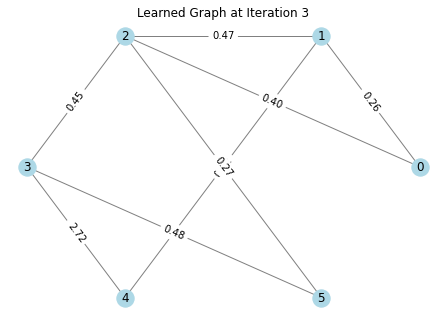

Iteration 4/5
after E-step: delta_W norm 0.0363, GLR 3.4978, adj norm^2 6.4556
after M-step-1: delta_W norm 0.1264, GLR 3.0122, adj norm^2 5.3596
PGD iter 1/50, ||S_new - S||_F = 0.2482
PGD iter 21/50, ||S_new - S||_F = 0.0891
PGD iter 41/50, ||S_new - S||_F = 0.0141
tensor([[0.0000e+00, 2.3672e-01, 3.5607e-01, 0.0000e+00, 6.9017e-04, 9.8059e-02],
        [2.3672e-01, 0.0000e+00, 1.8468e-01, 1.4503e-01, 0.0000e+00, 0.0000e+00],
        [3.5607e-01, 1.8468e-01, 0.0000e+00, 3.4015e-01, -0.0000e+00, 2.9334e-02],
        [0.0000e+00, 1.4503e-01, 3.4015e-01, 0.0000e+00, 1.0000e+00, 4.6530e-01],
        [6.9017e-04, 0.0000e+00, -0.0000e+00, 1.0000e+00, 0.0000e+00, 2.3767e-01],
        [9.8059e-02, 0.0000e+00, 2.9334e-02, 4.6530e-01, 2.3767e-01, 0.0000e+00]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 4 tensor(5.1952, grad_fn=<PowBackward0>)


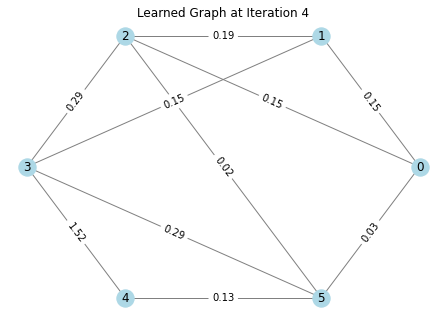

Iteration 5/5
after E-step: delta_W norm 0.1616, GLR 4.2500, adj norm^2 6.4717
after M-step-1: delta_W norm 0.1183, GLR 3.7420, adj norm^2 6.2123
PGD iter 1/50, ||S_new - S||_F = 0.2605
PGD iter 21/50, ||S_new - S||_F = 0.1009
PGD iter 41/50, ||S_new - S||_F = 0.0194
tensor([[0.0000, 0.4149, 0.0324, 0.2418, -0.0000, 0.0000],
        [0.4149, 0.0000, 0.4894, 0.0000, 0.0000, 0.0000],
        [0.0324, 0.4894, 0.0000, 0.1575, 0.0414, 0.1504],
        [0.2418, 0.0000, 0.1575, 0.0000, 0.5850, 0.4394],
        [-0.0000, 0.0000, 0.0414, 0.5850, 0.0000, 0.2363],
        [0.0000, 0.0000, 0.1504, 0.4394, 0.2363, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 5 tensor(2.4015, grad_fn=<PowBackward0>)


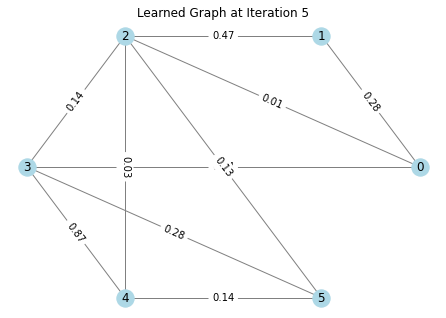

Final learned adjacency matrix:
tensor([[0.0000, 0.2762, 0.0136, 0.1362, -0.0000, 0.0000],
        [0.2762, 0.0000, 0.4682, 0.0000, 0.0000, 0.0000],
        [0.0136, 0.4682, 0.0000, 0.1436, 0.0308, 0.1261],
        [0.1362, 0.0000, 0.1436, 0.0000, 0.8668, 0.2802],
        [-0.0000, 0.0000, 0.0308, 0.8668, 0.0000, 0.1383],
        [0.0000, 0.0000, 0.1261, 0.2802, 0.1383, 0.0000]],
       grad_fn=<MulBackward0>) tensor(2.4015, grad_fn=<PowBackward0>)


In [ ]:
arg_dict = {
    'mu': 0.2,
    'gamma': 0.8,
    'step_size': 0.02,
    'c': 5,
    'PGD_iters': 50,
    'use_block_coordinate': False,
    'PGD_step_size': 0.04
}
Experiment(arg_dict, num_nodes, S_init=None, seed=42)

Iteration 1/5
after E-step: delta_W norm 0.1010, GLR 8.4903, adj norm^2 7.2003
after M-step-1: delta_W norm 0.1714, GLR 7.4323, adj norm^2 7.4225
PGD iter 1/50, ||S_new - S||_F = 0.0309
PGD iter 21/50, ||S_new - S||_F = 0.0298
PGD iter 41/50, ||S_new - S||_F = 0.0284
tensor([[0.0000, 0.8168, 0.7687, 0.7481, 0.6637, 0.7436],
        [0.8168, 0.0000, 0.6786, 0.6426, 0.6486, 0.7127],
        [0.7687, 0.6786, 0.0000, 0.7844, 0.7930, 0.7507],
        [0.7481, 0.6426, 0.7844, 0.0000, 0.7641, 0.8062],
        [0.6637, 0.6486, 0.7930, 0.7641, 0.0000, 0.7354],
        [0.7436, 0.7127, 0.7507, 0.8062, 0.7354, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 1 tensor(2.6799, grad_fn=<PowBackward0>)


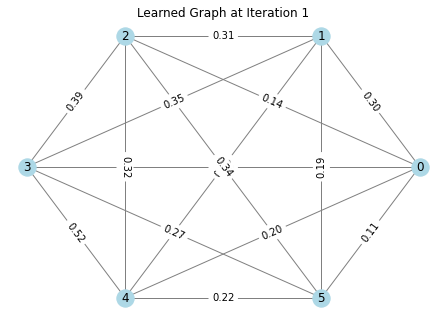

Iteration 2/5
after E-step: delta_W norm 0.1660, GLR 7.6234, adj norm^2 7.1892
after M-step-1: delta_W norm 0.0997, GLR 9.4199, adj norm^2 6.6199
PGD iter 1/50, ||S_new - S||_F = 0.0334
PGD iter 21/50, ||S_new - S||_F = 0.0322
PGD iter 41/50, ||S_new - S||_F = 0.0307
tensor([[0.0000, 0.7217, 0.7536, 0.7300, 0.6693, 0.7063],
        [0.7217, 0.0000, 0.7485, 0.5565, 0.6592, 0.6879],
        [0.7536, 0.7485, 0.0000, 0.6639, 0.6987, 0.6884],
        [0.7300, 0.5565, 0.6639, 0.0000, 0.9312, 0.7767],
        [0.6693, 0.6592, 0.6987, 0.9312, 0.0000, 0.8313],
        [0.7063, 0.6879, 0.6884, 0.7767, 0.8313, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 2 tensor(5.1466, grad_fn=<PowBackward0>)


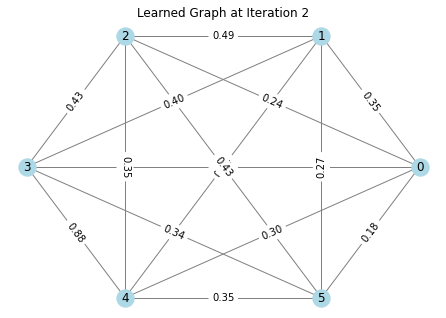

Iteration 3/5
after E-step: delta_W norm 0.1000, GLR 7.6609, adj norm^2 7.1599
after M-step-1: delta_W norm 0.1570, GLR 7.1747, adj norm^2 7.1191
PGD iter 1/50, ||S_new - S||_F = 0.0359
PGD iter 21/50, ||S_new - S||_F = 0.0346
PGD iter 41/50, ||S_new - S||_F = 0.0329
tensor([[0.0000, 0.6787, 0.7669, 0.6129, 0.5895, 0.7510],
        [0.6787, 0.0000, 0.6697, 0.5527, 0.6511, 0.6941],
        [0.7669, 0.6697, 0.0000, 0.7472, 0.6974, 0.6215],
        [0.6129, 0.5527, 0.7472, 0.0000, 0.8186, 0.7787],
        [0.5895, 0.6511, 0.6974, 0.8186, 0.0000, 0.8833],
        [0.7510, 0.6941, 0.6215, 0.7787, 0.8833, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 3 tensor(4.5171, grad_fn=<PowBackward0>)


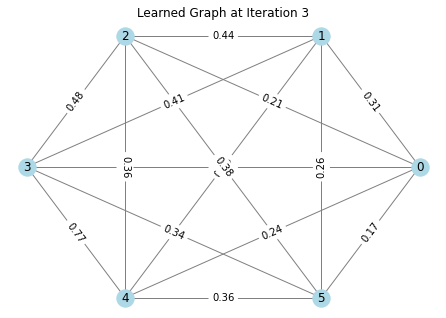

Iteration 4/5
after E-step: delta_W norm 0.1500, GLR 9.6194, adj norm^2 7.1708
after M-step-1: delta_W norm 0.0751, GLR 7.7002, adj norm^2 7.0204
PGD iter 1/50, ||S_new - S||_F = 0.0362
PGD iter 21/50, ||S_new - S||_F = 0.0348
PGD iter 41/50, ||S_new - S||_F = 0.0331
tensor([[0.0000, 0.6570, 0.7929, 0.6318, 0.5615, 0.7031],
        [0.6570, 0.0000, 0.8237, 0.6287, 0.5559, 0.6221],
        [0.7929, 0.8237, 0.0000, 0.7343, 0.6932, 0.7568],
        [0.6318, 0.6287, 0.7343, 0.0000, 0.7019, 0.8290],
        [0.5615, 0.5559, 0.6932, 0.7019, 0.0000, 0.7766],
        [0.7031, 0.6221, 0.7568, 0.8290, 0.7766, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 4 tensor(4.9437, grad_fn=<PowBackward0>)


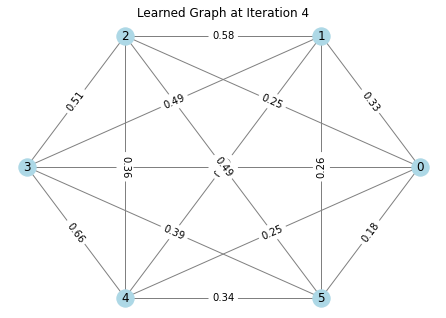

Iteration 5/5
after E-step: delta_W norm 0.0795, GLR 8.3645, adj norm^2 7.1641
after M-step-1: delta_W norm 0.0625, GLR 8.6265, adj norm^2 6.9950
PGD iter 1/50, ||S_new - S||_F = 0.0354
PGD iter 21/50, ||S_new - S||_F = 0.0341
PGD iter 41/50, ||S_new - S||_F = 0.0324
tensor([[0.0000, 0.8369, 0.7889, 0.6644, 0.5922, 0.6937],
        [0.8369, 0.0000, 0.7383, 0.6247, 0.6524, 0.6652],
        [0.7889, 0.7383, 0.0000, 0.8211, 0.6448, 0.6701],
        [0.6644, 0.6247, 0.8211, 0.0000, 0.6032, 0.7667],
        [0.5922, 0.6524, 0.6448, 0.6032, 0.0000, 0.7773],
        [0.6937, 0.6652, 0.6701, 0.7667, 0.7773, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 5 tensor(4.9515, grad_fn=<PowBackward0>)


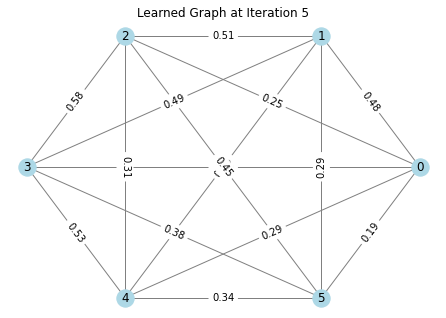

Final learned adjacency matrix:
tensor([[0.0000, 0.4824, 0.2469, 0.2987, 0.2936, 0.1910],
        [0.4824, 0.0000, 0.5070, 0.4870, 0.4519, 0.2911],
        [0.2469, 0.5070, 0.0000, 0.5818, 0.3102, 0.4530],
        [0.2987, 0.4870, 0.5818, 0.0000, 0.5347, 0.3846],
        [0.2936, 0.4519, 0.3102, 0.5347, 0.0000, 0.3365],
        [0.1910, 0.2911, 0.4530, 0.3846, 0.3365, 0.0000]],
       grad_fn=<MulBackward0>) tensor(4.9515, grad_fn=<PowBackward0>)


In [5]:
arg_dict = {
    'mu': 0.2,
    'gamma': 0.4,
    'step_size': 0.02,
    'c': 5,
    'PGD_iters': 50,
    'use_block_coordinate': False,
    'PGD_step_size': 0.01
}
Experiment(arg_dict, num_nodes, S_init=None, seed=42)

Iteration 1/5
after E-step: delta_W norm 0.1010, GLR 8.4903, adj norm^2 7.2003
after M-step-1: delta_W norm 0.1714, GLR 7.4323, adj norm^2 7.4225
PGD iter 1/100, ||S_new - S||_F = 0.0618
PGD iter 21/100, ||S_new - S||_F = 0.0568
PGD iter 41/100, ||S_new - S||_F = 0.0490
PGD iter 61/100, ||S_new - S||_F = 0.0372
PGD iter 81/100, ||S_new - S||_F = 0.0226
tensor([[0.0000, 0.5774, 0.2741, 0.2684, 0.0287, 0.1662],
        [0.5774, 0.0000, 0.1673, 0.1149, 0.1703, 0.1561],
        [0.2741, 0.1673, 0.0000, 0.4085, 0.4276, 0.3387],
        [0.2684, 0.1149, 0.4085, 0.0000, 0.4244, 0.4636],
        [0.0287, 0.1703, 0.4276, 0.4244, 0.0000, 0.2032],
        [0.1662, 0.1561, 0.3387, 0.4636, 0.2032, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 1 tensor(0.5567, grad_fn=<PowBackward0>)


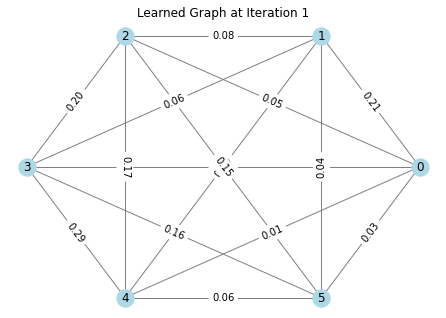

Iteration 2/5
after E-step: delta_W norm 0.1350, GLR 8.1117, adj norm^2 6.9923
after M-step-1: delta_W norm 0.0928, GLR 6.8293, adj norm^2 6.3854
PGD iter 1/100, ||S_new - S||_F = 0.1434
PGD iter 21/100, ||S_new - S||_F = 0.1259
PGD iter 41/100, ||S_new - S||_F = 0.0383
PGD iter 61/100, ||S_new - S||_F = 0.0100
PGD iter 81/100, ||S_new - S||_F = 0.0048
tensor([[0.0000, 0.2909, 0.0344, 0.0000, 0.0000, 0.2083],
        [0.2909, 0.0000, 0.5790, 0.0674, 0.0000, 0.0000],
        [0.0344, 0.5790, 0.0000, 0.2170, 0.3131, 0.0000],
        [0.0000, 0.0674, 0.2170, 0.0000, 0.2197, 0.2840],
        [0.0000, 0.0000, 0.3131, 0.2197, 0.0000, 0.1160],
        [0.2083, 0.0000, 0.0000, 0.2840, 0.1160, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 2 tensor(2.6146, grad_fn=<PowBackward0>)


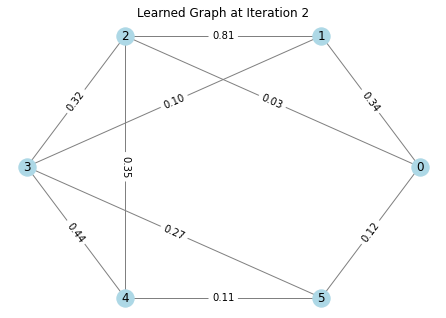

Iteration 3/5
after E-step: delta_W norm 0.0998, GLR 5.1390, adj norm^2 6.6560
after M-step-1: delta_W norm 0.2565, GLR 4.0944, adj norm^2 6.0099
PGD iter 1/100, ||S_new - S||_F = 0.1963
PGD iter 21/100, ||S_new - S||_F = 0.1441
PGD iter 41/100, ||S_new - S||_F = 0.0258
PGD iter 61/100, ||S_new - S||_F = 0.0077
PGD iter 81/100, ||S_new - S||_F = 0.0035
tensor([[0.0000, 0.1750, 0.1391, 0.0000, 0.0523, 0.0428],
        [0.1750, 0.0000, 0.2686, -0.0000, 0.0000, 0.0481],
        [0.1391, 0.2686, 0.0000, 0.3263, 0.0000, 0.0105],
        [0.0000, -0.0000, 0.3263, 0.0000, 0.2596, 0.2282],
        [0.0523, 0.0000, 0.0000, 0.2596, 0.0000, 0.1124],
        [0.0428, 0.0481, 0.0105, 0.2282, 0.1124, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 3 tensor(2.4636, grad_fn=<PowBackward0>)


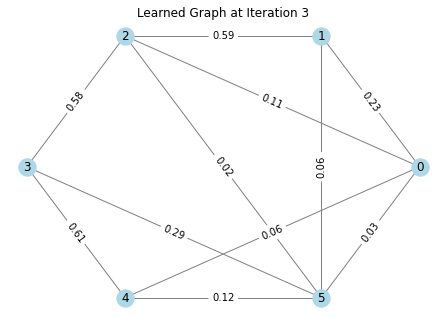

Iteration 4/5
after E-step: delta_W norm 0.2058, GLR 4.1623, adj norm^2 6.5983
after M-step-1: delta_W norm 0.0809, GLR 4.7428, adj norm^2 6.4786
PGD iter 1/100, ||S_new - S||_F = 0.2547
PGD iter 21/100, ||S_new - S||_F = 0.1072
PGD iter 41/100, ||S_new - S||_F = 0.0156
PGD iter 61/100, ||S_new - S||_F = 0.0068
PGD iter 81/100, ||S_new - S||_F = 0.0025
tensor([[0.0000, 0.0214, 0.3647, 0.0000, 0.0082, -0.0000],
        [0.0214, 0.0000, 1.0000, 0.0000, 0.0000, 0.0000],
        [0.3647, 1.0000, 0.0000, 0.4716, -0.0000, -0.0000],
        [0.0000, 0.0000, 0.4716, 0.0000, 0.1635, 0.2498],
        [0.0082, 0.0000, -0.0000, 0.1635, 0.0000, 0.2626],
        [-0.0000, 0.0000, -0.0000, 0.2498, 0.2626, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 4 tensor(19.4469, grad_fn=<PowBackward0>)


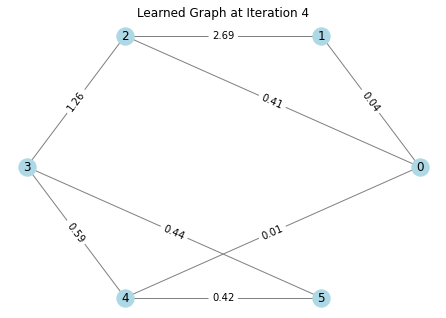

Iteration 5/5
after E-step: delta_W norm 0.0447, GLR 3.2183, adj norm^2 6.3385
after M-step-1: delta_W norm 0.1213, GLR 3.6005, adj norm^2 6.2274
PGD iter 1/100, ||S_new - S||_F = 0.1680
PGD iter 21/100, ||S_new - S||_F = 0.1274
PGD iter 41/100, ||S_new - S||_F = 0.0279
PGD iter 61/100, ||S_new - S||_F = 0.0125
PGD iter 81/100, ||S_new - S||_F = 0.0080
tensor([[0.0000, 0.3240, 0.0000, 0.0176, 0.0497, 0.0311],
        [0.3240, 0.0000, 0.4177, 0.0000, -0.0000, 0.0000],
        [0.0000, 0.4177, 0.0000, 0.3152, -0.0000, 0.0533],
        [0.0176, 0.0000, 0.3152, 0.0000, 0.5499, 0.3497],
        [0.0497, -0.0000, -0.0000, 0.5499, 0.0000, 0.3826],
        [0.0311, 0.0000, 0.0533, 0.3497, 0.3826, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 5 tensor(3.0364, grad_fn=<PowBackward0>)


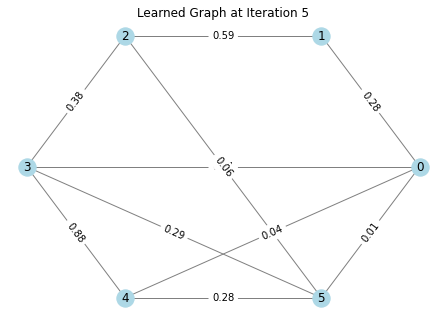

Final learned adjacency matrix:
tensor([[0.0000, 0.2832, 0.0000, 0.0134, 0.0406, 0.0143],
        [0.2832, 0.0000, 0.5890, 0.0000, -0.0000, 0.0000],
        [0.0000, 0.5890, 0.0000, 0.3788, -0.0000, 0.0600],
        [0.0134, 0.0000, 0.3788, 0.0000, 0.8812, 0.2915],
        [0.0406, -0.0000, -0.0000, 0.8812, 0.0000, 0.2838],
        [0.0143, 0.0000, 0.0600, 0.2915, 0.2838, 0.0000]],
       grad_fn=<MulBackward0>) tensor(3.0364, grad_fn=<PowBackward0>)


In [6]:
arg_dict = {
    'mu': 0.2,
    'gamma': 0.4,
    'step_size': 0.02,
    'c': 5,
    'PGD_iters': 100,
    'use_block_coordinate': False,
    'PGD_step_size': 0.02
}
Experiment(arg_dict, num_nodes, S_init=None, seed=42)

Iteration 1/5
after E-step: delta_W norm 0.1010, GLR 8.4903, adj norm^2 7.2003
after M-step-1: delta_W norm 0.1714, GLR 7.4323, adj norm^2 7.4225
PGD iter 1/100, ||S_new - S||_F = 0.1236
PGD iter 21/100, ||S_new - S||_F = 0.0979
PGD iter 41/100, ||S_new - S||_F = 0.0445
PGD iter 61/100, ||S_new - S||_F = 0.0148
PGD iter 81/100, ||S_new - S||_F = 0.0064
tensor([[0.0000, 0.6453, 0.1017, 0.2413, 0.0015, 0.0000],
        [0.6453, 0.0000, 0.1864, 0.1295, 0.2445, 0.0629],
        [0.1017, 0.1864, 0.0000, 0.3197, 0.3497, 0.3813],
        [0.2413, 0.1295, 0.3197, 0.0000, 0.4264, 0.4549],
        [0.0015, 0.2445, 0.3497, 0.4264, 0.0000, 0.0579],
        [0.0000, 0.0629, 0.3813, 0.4549, 0.0579, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 1 tensor(0.5463, grad_fn=<PowBackward0>)


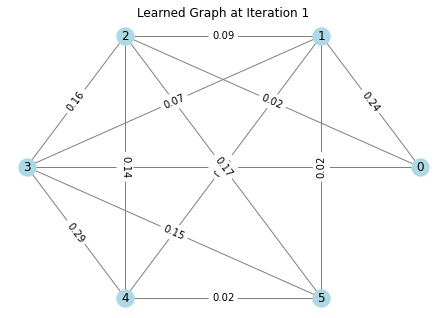

Iteration 2/5
after E-step: delta_W norm 0.1227, GLR 7.0396, adj norm^2 6.9525
after M-step-1: delta_W norm 0.1597, GLR 7.2108, adj norm^2 6.5258
PGD iter 1/100, ||S_new - S||_F = 0.3063
PGD iter 21/100, ||S_new - S||_F = 0.0678
PGD iter 41/100, ||S_new - S||_F = 0.0104
PGD iter 61/100, ||S_new - S||_F = 0.0032
PGD iter 81/100, ||S_new - S||_F = 0.0015
tensor([[0.0000, 0.3926, 0.3116, 0.0131, 0.0000, 0.0000],
        [0.3926, 0.0000, 0.0997, 0.0521, 0.0000, 0.0722],
        [0.3116, 0.0997, 0.0000, 0.0320, 0.3454, 0.1172],
        [0.0131, 0.0521, 0.0320, 0.0000, 0.4629, 0.2124],
        [0.0000, 0.0000, 0.3454, 0.4629, 0.0000, 0.1210],
        [0.0000, 0.0722, 0.1172, 0.2124, 0.1210, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 2 tensor(2.8973, grad_fn=<PowBackward0>)


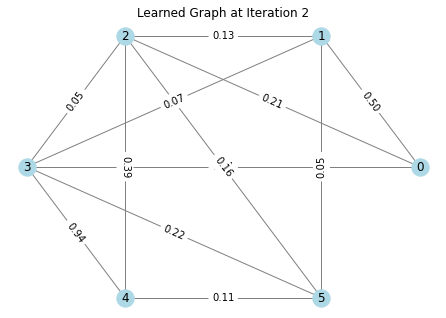

Iteration 3/5
after E-step: delta_W norm 0.0796, GLR 4.5971, adj norm^2 6.6714
after M-step-1: delta_W norm 0.2571, GLR 5.0173, adj norm^2 6.4644
PGD iter 1/100, ||S_new - S||_F = 0.3866
PGD iter 21/100, ||S_new - S||_F = 0.0575
PGD iter 41/100, ||S_new - S||_F = 0.0116
PGD iter 61/100, ||S_new - S||_F = 0.0026
PGD iter 81/100, ||S_new - S||_F = 0.0006
tensor([[0.0000, 0.4168, 0.0000, 0.1435, 0.0000, 0.0000],
        [0.4168, 0.0000, 0.1634, 0.0367, -0.0000, 0.0000],
        [0.0000, 0.1634, 0.0000, -0.0000, 0.1948, 0.0611],
        [0.1435, 0.0367, -0.0000, 0.0000, 1.0000, 0.2570],
        [0.0000, -0.0000, 0.1948, 1.0000, 0.0000, 0.2212],
        [0.0000, 0.0000, 0.0611, 0.2570, 0.2212, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 3 tensor(17.3488, grad_fn=<PowBackward0>)


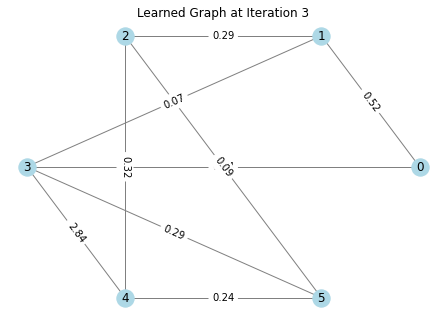

Iteration 4/5
after E-step: delta_W norm 0.1342, GLR 2.8027, adj norm^2 6.4274
after M-step-1: delta_W norm 0.1429, GLR 2.8906, adj norm^2 5.8588
PGD iter 1/100, ||S_new - S||_F = 0.2552
PGD iter 21/100, ||S_new - S||_F = 0.0700
PGD iter 41/100, ||S_new - S||_F = 0.0174
PGD iter 61/100, ||S_new - S||_F = 0.0102
PGD iter 81/100, ||S_new - S||_F = 0.0049
tensor([[0.0000, 0.4632, 0.0496, 0.0000, 0.1010, 0.0000],
        [0.4632, 0.0000, 0.3392, 0.0403, 0.0000, 0.0000],
        [0.0496, 0.3392, 0.0000, 0.3367, 0.0000, 0.0602],
        [0.0000, 0.0403, 0.3367, 0.0000, 1.0000, 0.2046],
        [0.1010, 0.0000, 0.0000, 1.0000, 0.0000, 0.6184],
        [0.0000, 0.0000, 0.0602, 0.2046, 0.6184, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 4 tensor(5.5638, grad_fn=<PowBackward0>)


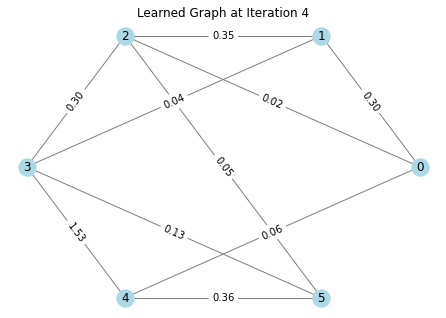

Iteration 5/5
after E-step: delta_W norm 0.1808, GLR 3.1466, adj norm^2 6.4774
after M-step-1: delta_W norm 0.0447, GLR 3.9196, adj norm^2 6.5626
PGD iter 1/100, ||S_new - S||_F = 0.2331
PGD iter 21/100, ||S_new - S||_F = 0.1008
PGD iter 41/100, ||S_new - S||_F = 0.0146
PGD iter 61/100, ||S_new - S||_F = 0.0068
PGD iter 81/100, ||S_new - S||_F = 0.0037
tensor([[0.0000, 0.3331, 0.2348, 0.0000, 0.1161, 0.0000],
        [0.3331, 0.0000, 0.3917, -0.0000, 0.0000, 0.2012],
        [0.2348, 0.3917, 0.0000, 0.2984, 0.0000, 0.0505],
        [0.0000, -0.0000, 0.2984, 0.0000, 0.5169, 0.4505],
        [0.1161, 0.0000, 0.0000, 0.5169, 0.0000, 0.4860],
        [0.0000, 0.2012, 0.0505, 0.4505, 0.4860, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 5 tensor(2.0731, grad_fn=<PowBackward0>)


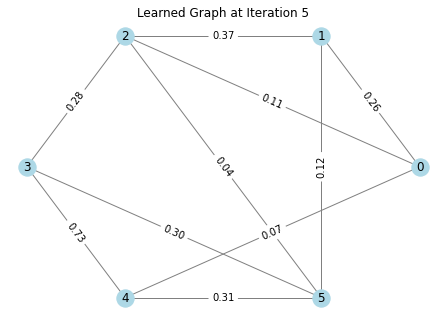

Final learned adjacency matrix:
tensor([[0.0000, 0.2605, 0.1150, 0.0000, 0.0748, 0.0000],
        [0.2605, 0.0000, 0.3726, -0.0000, 0.0000, 0.1196],
        [0.1150, 0.3726, 0.0000, 0.2789, 0.0000, 0.0437],
        [0.0000, -0.0000, 0.2789, 0.0000, 0.7277, 0.3015],
        [0.0748, 0.0000, 0.0000, 0.7277, 0.0000, 0.3108],
        [0.0000, 0.1196, 0.0437, 0.3015, 0.3108, 0.0000]],
       grad_fn=<MulBackward0>) tensor(2.0731, grad_fn=<PowBackward0>)


In [7]:
arg_dict = {
    'mu': 0.2,
    'gamma': 0.4,
    'step_size': 0.02,
    'c': 5,
    'PGD_iters': 100,
    'use_block_coordinate': False,
    'PGD_step_size': 0.04
}
Experiment(arg_dict, num_nodes, S_init=None, seed=42)

Iteration 1/5
after E-step: delta_W norm 0.1010, GLR 8.4903, adj norm^2 7.2003
after M-step-1: delta_W norm 0.1714, GLR 7.4323, adj norm^2 7.4225
PGD iter 1/50, ||S_new - S||_F = 0.1051
PGD iter 21/50, ||S_new - S||_F = 0.0945
PGD iter 41/50, ||S_new - S||_F = 0.0672
tensor([[0.0000, 0.3960, 0.2329, 0.2250, 0.0911, 0.1775],
        [0.3960, 0.0000, 0.1535, 0.1136, 0.1344, 0.1593],
        [0.2329, 0.1535, 0.0000, 0.3167, 0.3197, 0.2747],
        [0.2250, 0.1136, 0.3167, 0.0000, 0.3203, 0.3396],
        [0.0911, 0.1344, 0.3197, 0.3203, 0.0000, 0.1988],
        [0.1775, 0.1593, 0.2747, 0.3396, 0.1988, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 1 tensor(0.3286, grad_fn=<PowBackward0>)


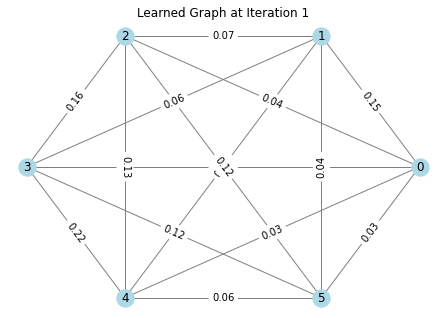

Iteration 2/5
after E-step: delta_W norm 0.1432, GLR 8.2839, adj norm^2 7.0514
after M-step-1: delta_W norm 0.1018, GLR 7.2880, adj norm^2 6.0756
PGD iter 1/50, ||S_new - S||_F = 0.2591
PGD iter 21/50, ||S_new - S||_F = 0.1271
PGD iter 41/50, ||S_new - S||_F = 0.0132
tensor([[0.0000, 0.1439, 0.0598, 0.0429, 0.0317, 0.0171],
        [0.1439, 0.0000, 0.1185, 0.0036, 0.0569, 0.0000],
        [0.0598, 0.1185, 0.0000, 0.0416, 0.0081, 0.1549],
        [0.0429, 0.0036, 0.0416, 0.0000, 0.2009, 0.2755],
        [0.0317, 0.0569, 0.0081, 0.2009, 0.0000, 0.0000],
        [0.0171, 0.0000, 0.1549, 0.2755, 0.0000, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 2 tensor(1.2382, grad_fn=<PowBackward0>)


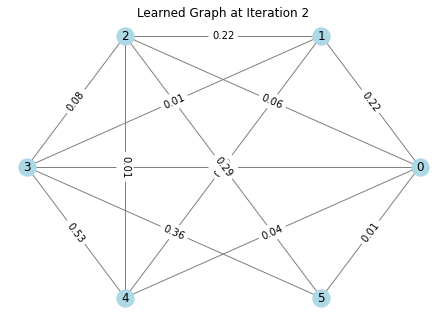

Iteration 3/5
after E-step: delta_W norm 0.0688, GLR 6.0116, adj norm^2 6.6903
after M-step-1: delta_W norm 0.0552, GLR 6.1053, adj norm^2 6.4613
PGD iter 1/50, ||S_new - S||_F = 0.4175
PGD iter 21/50, ||S_new - S||_F = 0.0595
PGD iter 41/50, ||S_new - S||_F = 0.0105
tensor([[0.0000, 0.0752, 0.0000, -0.0000, 0.0812, 0.0000],
        [0.0752, 0.0000, 0.1138, 0.0000, 0.0000, -0.0000],
        [0.0000, 0.1138, 0.0000, -0.0000, 0.1497, 0.0582],
        [-0.0000, 0.0000, -0.0000, 0.0000, 0.7343, 0.0000],
        [0.0812, 0.0000, 0.1497, 0.7343, 0.0000, 0.3463],
        [0.0000, -0.0000, 0.0582, 0.0000, 0.3463, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 3 tensor(32.3605, grad_fn=<PowBackward0>)


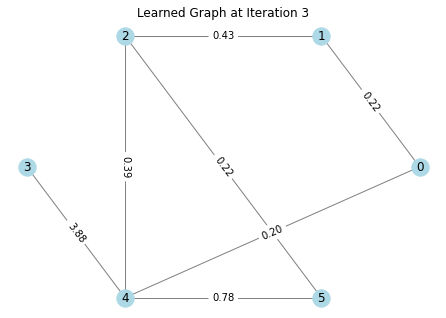

Iteration 4/5
after E-step: delta_W norm 0.0364, GLR 2.4461, adj norm^2 6.3878
after M-step-1: delta_W norm 0.1076, GLR 2.9230, adj norm^2 5.7576
PGD iter 1/50, ||S_new - S||_F = 0.2265
PGD iter 21/50, ||S_new - S||_F = 0.1382
PGD iter 41/50, ||S_new - S||_F = 0.0193
tensor([[0.0000, 0.1196, 0.2656, 0.0000, 0.0242, 0.0135],
        [0.1196, 0.0000, 0.1591, 0.0000, 0.0278, 0.0231],
        [0.2656, 0.1591, 0.0000, 0.2467, 0.0000, 0.0211],
        [0.0000, 0.0000, 0.2467, 0.0000, 0.7013, 0.0291],
        [0.0242, 0.0278, 0.0000, 0.7013, 0.0000, 0.3709],
        [0.0135, 0.0231, 0.0211, 0.0291, 0.3709, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 4 tensor(4.8192, grad_fn=<PowBackward0>)


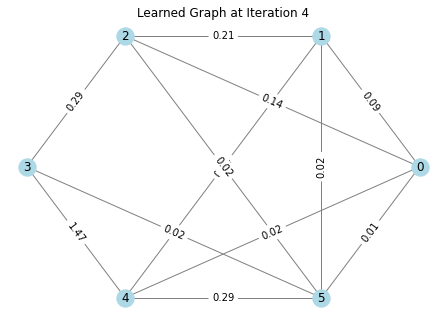

Iteration 5/5
after E-step: delta_W norm 0.1604, GLR 3.4194, adj norm^2 6.4286
after M-step-1: delta_W norm 0.0802, GLR 2.7419, adj norm^2 6.1457
PGD iter 1/50, ||S_new - S||_F = 0.2257
PGD iter 21/50, ||S_new - S||_F = 0.1503
PGD iter 41/50, ||S_new - S||_F = 0.0230
tensor([[0.0000, 0.1142, 0.2175, 0.0021, 0.0137, 0.0477],
        [0.1142, 0.0000, 0.1768, 0.1127, -0.0000, 0.0000],
        [0.2175, 0.1768, 0.0000, 0.0250, 0.0682, 0.0567],
        [0.0021, 0.1127, 0.0250, 0.0000, 0.3650, 0.1157],
        [0.0137, -0.0000, 0.0682, 0.3650, 0.0000, 0.3011],
        [0.0477, 0.0000, 0.0567, 0.1157, 0.3011, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 5 tensor(1.6154, grad_fn=<PowBackward0>)


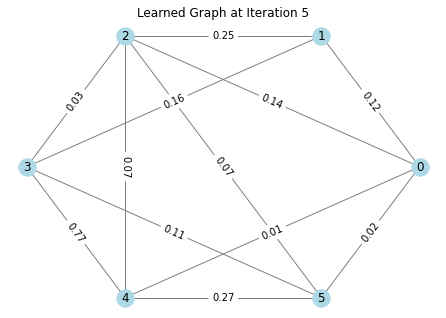

Final learned adjacency matrix:
tensor([[0.0000, 0.1172, 0.1429, 0.0018, 0.0120, 0.0245],
        [0.1172, 0.0000, 0.2480, 0.1563, -0.0000, 0.0000],
        [0.1429, 0.2480, 0.0000, 0.0329, 0.0708, 0.0707],
        [0.0018, 0.1563, 0.0329, 0.0000, 0.7699, 0.1099],
        [0.0120, -0.0000, 0.0708, 0.7699, 0.0000, 0.2663],
        [0.0245, 0.0000, 0.0707, 0.1099, 0.2663, 0.0000]],
       grad_fn=<MulBackward0>) tensor(1.6154, grad_fn=<PowBackward0>)


In [8]:
arg_dict = {
    'mu': 0.2,
    'gamma': 0.8,
    'step_size': 0.02,
    'c': 5,
    'PGD_iters': 50,
    'use_block_coordinate': False,
    'PGD_step_size': 0.02
}
Experiment(arg_dict, num_nodes, S_init=None, seed=42)

Iteration 1/5
after E-step: delta_W norm 0.1010, GLR 8.4903, adj norm^2 7.2003
after M-step-1: delta_W norm 0.0846, GLR 9.1415, adj norm^2 7.3336
PGD iter 1/50, ||S_new - S||_F = 0.1059
PGD iter 21/50, ||S_new - S||_F = 0.0951
PGD iter 41/50, ||S_new - S||_F = 0.0673
tensor([[0.0000, 0.3900, 0.2282, 0.2168, 0.0755, 0.1644],
        [0.3900, 0.0000, 0.1502, 0.1141, 0.1399, 0.1500],
        [0.2282, 0.1502, 0.0000, 0.3176, 0.3187, 0.2713],
        [0.2168, 0.1141, 0.3176, 0.0000, 0.3239, 0.3366],
        [0.0755, 0.1399, 0.3187, 0.3239, 0.0000, 0.1973],
        [0.1644, 0.1500, 0.2713, 0.3366, 0.1973, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 1 tensor(0.3224, grad_fn=<PowBackward0>)


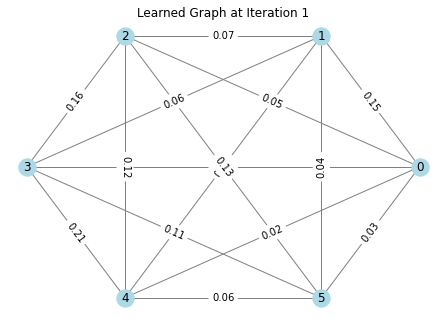

Iteration 2/5
after E-step: delta_W norm 0.0709, GLR 7.2965, adj norm^2 7.0521
after M-step-1: delta_W norm 0.0523, GLR 7.2307, adj norm^2 6.7767
PGD iter 1/50, ||S_new - S||_F = 0.2177
PGD iter 21/50, ||S_new - S||_F = 0.1189
PGD iter 41/50, ||S_new - S||_F = 0.0205
tensor([[0.0000, 0.0931, 0.3039, 0.0205, 0.0000, 0.0000],
        [0.0931, 0.0000, 0.6856, 0.0000, -0.0000, -0.0000],
        [0.3039, 0.6856, 0.0000, 0.1544, 0.1600, 0.0608],
        [0.0205, 0.0000, 0.1544, 0.0000, 0.3044, 0.0000],
        [0.0000, -0.0000, 0.1600, 0.3044, 0.0000, 0.6450],
        [0.0000, -0.0000, 0.0608, 0.0000, 0.6450, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 2 tensor(6.3226, grad_fn=<PowBackward0>)


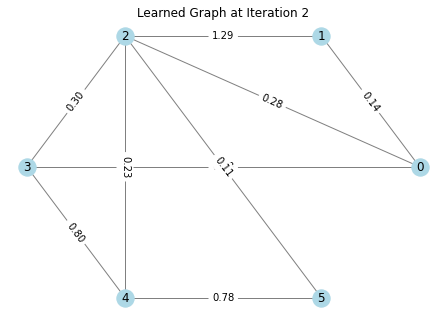

Iteration 3/5
after E-step: delta_W norm 0.0682, GLR 4.3754, adj norm^2 6.5009
after M-step-1: delta_W norm 0.0382, GLR 4.0050, adj norm^2 6.3253
PGD iter 1/50, ||S_new - S||_F = 0.2349
PGD iter 21/50, ||S_new - S||_F = 0.1261
PGD iter 41/50, ||S_new - S||_F = 0.0190
tensor([[0.0000, 0.1681, 0.0914, 0.0717, 0.0000, 0.0000],
        [0.1681, 0.0000, 0.1146, 0.0347, 0.0337, 0.0000],
        [0.0914, 0.1146, 0.0000, 0.0603, 0.0646, 0.0745],
        [0.0717, 0.0347, 0.0603, 0.0000, 0.1404, 0.2104],
        [0.0000, 0.0337, 0.0646, 0.1404, 0.0000, 0.6106],
        [0.0000, 0.0000, 0.0745, 0.2104, 0.6106, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 3 tensor(1.3877, grad_fn=<PowBackward0>)


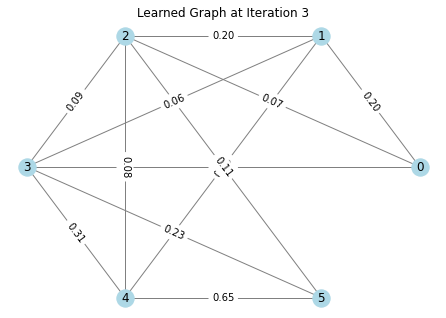

Iteration 4/5
after E-step: delta_W norm 0.0563, GLR 5.6364, adj norm^2 6.6627
after M-step-1: delta_W norm 0.0509, GLR 5.4856, adj norm^2 6.2086
PGD iter 1/50, ||S_new - S||_F = 0.3561
PGD iter 21/50, ||S_new - S||_F = 0.0686
PGD iter 41/50, ||S_new - S||_F = 0.0109
tensor([[0.0000, 0.0422, 0.3031, 0.0160, 0.0000, 0.0000],
        [0.0422, 0.0000, 0.1568, 0.0752, 0.0000, -0.0000],
        [0.3031, 0.1568, 0.0000, 0.0313, 0.0000, 0.0539],
        [0.0160, 0.0752, 0.0313, 0.0000, 1.0000, 0.1109],
        [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.1268],
        [0.0000, -0.0000, 0.0539, 0.1109, 0.1268, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 4 tensor(35.6296, grad_fn=<PowBackward0>)


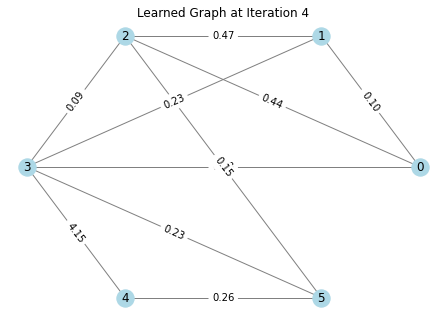

Iteration 5/5
after E-step: delta_W norm 0.0124, GLR 2.2183, adj norm^2 6.3492
after M-step-1: delta_W norm 0.0283, GLR 2.7089, adj norm^2 6.1708
PGD iter 1/50, ||S_new - S||_F = 0.1913
PGD iter 21/50, ||S_new - S||_F = 0.1406
PGD iter 41/50, ||S_new - S||_F = 0.0287
tensor([[0.0000, 0.1491, 0.2387, 0.0537, 0.0000, 0.0000],
        [0.1491, 0.0000, 0.2300, 0.0691, 0.0000, 0.0000],
        [0.2387, 0.2300, 0.0000, 0.0376, 0.1192, 0.1429],
        [0.0537, 0.0691, 0.0376, 0.0000, 0.4249, 0.3333],
        [0.0000, 0.0000, 0.1192, 0.4249, 0.0000, 0.0678],
        [0.0000, 0.0000, 0.1429, 0.3333, 0.0678, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 5 tensor(1.2412, grad_fn=<PowBackward0>)


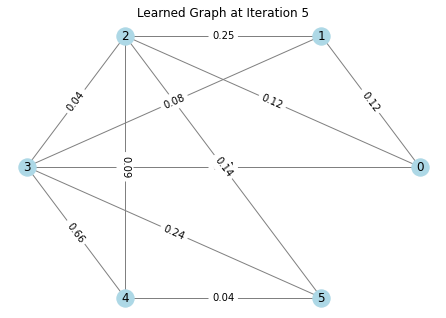

Final learned adjacency matrix:
tensor([[0.0000, 0.1160, 0.1154, 0.0358, 0.0000, 0.0000],
        [0.1160, 0.0000, 0.2489, 0.0770, 0.0000, 0.0000],
        [0.1154, 0.2489, 0.0000, 0.0376, 0.0905, 0.1363],
        [0.0358, 0.0770, 0.0376, 0.0000, 0.6616, 0.2383],
        [0.0000, 0.0000, 0.0905, 0.6616, 0.0000, 0.0444],
        [0.0000, 0.0000, 0.1363, 0.2383, 0.0444, 0.0000]],
       grad_fn=<MulBackward0>) tensor(1.2412, grad_fn=<PowBackward0>)


In [21]:
arg_dict = {
    'mu': 0.2,
    'gamma': 0.8,
    'step_size': 0.01,
    'c': 5,
    'PGD_iters': 50,
    'use_block_coordinate': False,
    'PGD_step_size': 0.02
}
Experiment(arg_dict, num_nodes, S_init=None, seed=42)

Iteration 1/5
after E-step: delta_W norm 0.0605, GLR 12.7287, adj norm^2 6.6416
after M-step-1: delta_W norm 0.3337, GLR 11.6353, adj norm^2 6.6028
PGD iter 1/50, ||S_new - S||_F = 0.0697
PGD iter 21/50, ||S_new - S||_F = 0.0638
PGD iter 41/50, ||S_new - S||_F = 0.0538
tensor([[0.0000, 0.6238, 0.5439, 0.3433, 0.4253, 0.4706],
        [0.6238, 0.0000, 0.5186, 0.2124, 0.3453, 0.3552],
        [0.5439, 0.5186, 0.0000, 0.2907, 0.5344, 0.4745],
        [0.3433, 0.2124, 0.2907, 0.0000, 0.5872, 0.5107],
        [0.4253, 0.3453, 0.5344, 0.5872, 0.0000, 0.6564],
        [0.4706, 0.3552, 0.4745, 0.5107, 0.6564, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 1 tensor(1.0734, grad_fn=<PowBackward0>)


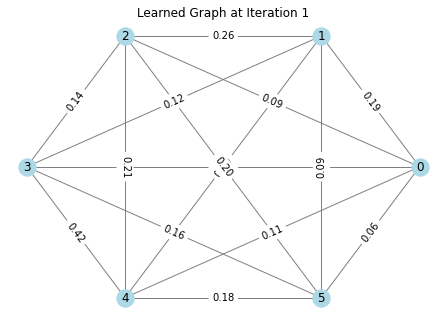

Iteration 2/5
after E-step: delta_W norm 0.3279, GLR 11.2092, adj norm^2 6.5742
after M-step-1: delta_W norm 0.1135, GLR 11.6543, adj norm^2 5.5419
PGD iter 1/50, ||S_new - S||_F = 0.1162
PGD iter 21/50, ||S_new - S||_F = 0.1041
PGD iter 41/50, ||S_new - S||_F = 0.0597
tensor([[0.0000, 0.2778, 0.2578, 0.0237, 0.0182, 0.0826],
        [0.2778, 0.0000, 0.2819, 0.0000, 0.1677, 0.0226],
        [0.2578, 0.2819, 0.0000, 0.2692, 0.1828, 0.0979],
        [0.0237, 0.0000, 0.2692, 0.0000, 0.3433, 0.6906],
        [0.0182, 0.1677, 0.1828, 0.3433, 0.0000, 0.6901],
        [0.0826, 0.0226, 0.0979, 0.6906, 0.6901, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 2 tensor(1.9231, grad_fn=<PowBackward0>)


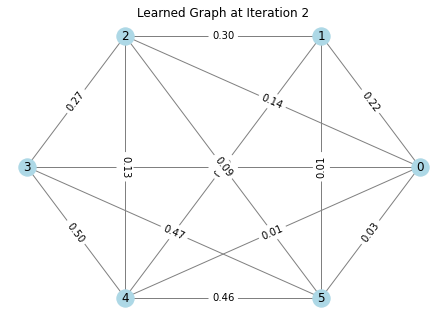

Iteration 3/5
after E-step: delta_W norm 0.1082, GLR 6.9255, adj norm^2 6.3817
after M-step-1: delta_W norm 0.3514, GLR 7.8143, adj norm^2 5.2402
PGD iter 1/50, ||S_new - S||_F = 0.2376
PGD iter 21/50, ||S_new - S||_F = 0.1208
PGD iter 41/50, ||S_new - S||_F = 0.0199
tensor([[0.0000, 0.2113, 0.0182, 0.0687, 0.0000, 0.0152],
        [0.2113, 0.0000, 0.2491, 0.0531, 0.0000, 0.0000],
        [0.0182, 0.2491, 0.0000, 0.0000, 0.1308, 0.0428],
        [0.0687, 0.0531, 0.0000, 0.0000, 0.6109, 0.6608],
        [0.0000, 0.0000, 0.1308, 0.6109, 0.0000, 0.3941],
        [0.0152, 0.0000, 0.0428, 0.6608, 0.3941, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 3 tensor(4.4783, grad_fn=<PowBackward0>)


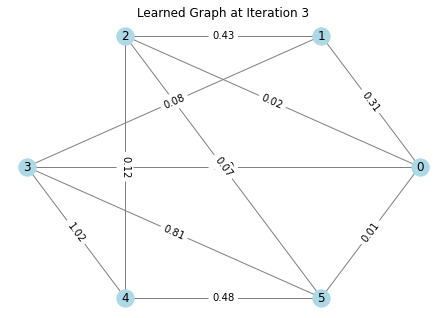

Iteration 4/5
after E-step: delta_W norm 0.3796, GLR 3.6809, adj norm^2 6.2613
after M-step-1: delta_W norm 0.7667, GLR 3.7594, adj norm^2 4.6674
PGD iter 1/50, ||S_new - S||_F = 0.2145
PGD iter 21/50, ||S_new - S||_F = 0.1086
PGD iter 41/50, ||S_new - S||_F = 0.0306
tensor([[0.0000, 0.5208, 0.6109, 0.0819, 0.0020, 0.5929],
        [0.5208, 0.0000, 0.3930, 0.0000, 0.0043, -0.0000],
        [0.6109, 0.3930, 0.0000, 0.0668, 0.0000, 0.2178],
        [0.0819, 0.0000, 0.0668, 0.0000, 0.2670, 0.5325],
        [0.0020, 0.0043, 0.0000, 0.2670, 0.0000, 0.6457],
        [0.5929, -0.0000, 0.2178, 0.5325, 0.6457, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 4 tensor(2.4081, grad_fn=<PowBackward0>)


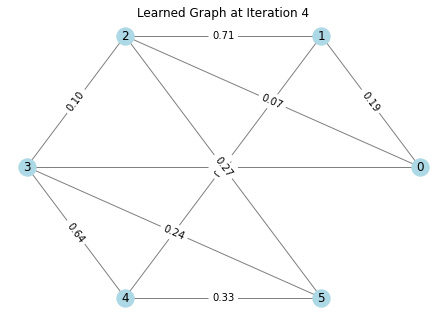

Iteration 5/5
after E-step: delta_W norm 1.2659, GLR 7.7407, adj norm^2 6.2517
after M-step-1: delta_W norm 0.3083, GLR 7.5912, adj norm^2 5.2056
PGD iter 1/50, ||S_new - S||_F = 0.1927
PGD iter 21/50, ||S_new - S||_F = 0.1444
PGD iter 41/50, ||S_new - S||_F = 0.0242
tensor([[0.0000, 0.0125, 0.4112, 0.0000, 0.0190, 0.1123],
        [0.0125, 0.0000, 0.4632, 0.0624, 0.0282, -0.0000],
        [0.4112, 0.4632, 0.0000, 0.0000, 0.0825, 0.0959],
        [0.0000, 0.0624, 0.0000, 0.0000, 0.3063, 0.2618],
        [0.0190, 0.0282, 0.0825, 0.3063, 0.0000, 0.0861],
        [0.1123, -0.0000, 0.0959, 0.2618, 0.0861, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 5 tensor(2.2688, grad_fn=<PowBackward0>)


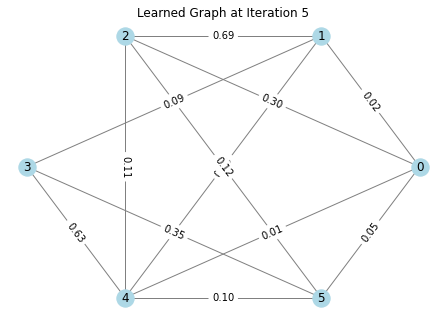

Final learned adjacency matrix:
tensor([[0.0000, 0.0156, 0.2978, 0.0000, 0.0130, 0.0481],
        [0.0156, 0.0000, 0.6862, 0.0907, 0.0335, -0.0000],
        [0.2978, 0.6862, 0.0000, 0.0000, 0.1114, 0.1226],
        [0.0000, 0.0907, 0.0000, 0.0000, 0.6349, 0.3493],
        [0.0130, 0.0335, 0.1114, 0.6349, 0.0000, 0.1011],
        [0.0481, -0.0000, 0.1226, 0.3493, 0.1011, 0.0000]],
       grad_fn=<MulBackward0>) tensor(2.2688, grad_fn=<PowBackward0>)


In [15]:
arg_dict = {
    'mu': 0.1,
    'gamma': 0.4,
    'step_size': 0.02,
    'c': 5,
    'PGD_iters': 50,
    'use_block_coordinate': False,
    'PGD_step_size': 0.02
}
Experiment(arg_dict, num_nodes, S_init=None, seed=42)

Iteration 1/5
after E-step: delta_W norm 0.1488, GLR 5.2718, adj norm^2 7.8985
after M-step-1: delta_W norm 0.0491, GLR 4.5055, adj norm^2 8.0126
PGD iter 1/50, ||S_new - S||_F = 0.0491
PGD iter 21/50, ||S_new - S||_F = 0.0453
PGD iter 41/50, ||S_new - S||_F = 0.0402
tensor([[0.0000, 0.6414, 0.6366, 0.6347, 0.6366, 0.6452],
        [0.6414, 0.0000, 0.7189, 0.4637, 0.4701, 0.4953],
        [0.6366, 0.7189, 0.0000, 0.4845, 0.6082, 0.6317],
        [0.6347, 0.4637, 0.4845, 0.0000, 0.7202, 0.6284],
        [0.6366, 0.4701, 0.6082, 0.7202, 0.0000, 0.7039],
        [0.6452, 0.4953, 0.6317, 0.6284, 0.7039, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 1 tensor(1.8702, grad_fn=<PowBackward0>)


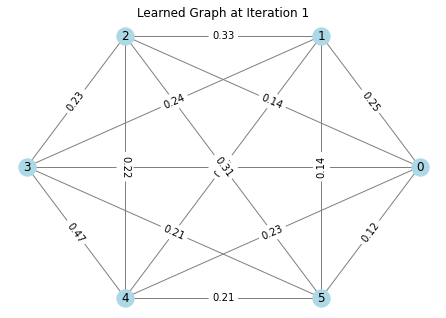

Iteration 2/5
after E-step: delta_W norm 0.0414, GLR 4.2118, adj norm^2 7.8565
after M-step-1: delta_W norm 0.0850, GLR 5.8252, adj norm^2 7.9617
PGD iter 1/50, ||S_new - S||_F = 0.0513
PGD iter 21/50, ||S_new - S||_F = 0.0481
PGD iter 41/50, ||S_new - S||_F = 0.0434
tensor([[0.0000, 0.8264, 0.5673, 0.5448, 0.4108, 0.3536],
        [0.8264, 0.0000, 1.0000, 1.0000, 0.2349, 0.5226],
        [0.5673, 1.0000, 0.0000, 0.6216, 0.9226, 0.6593],
        [0.5448, 1.0000, 0.6216, 0.0000, 0.3936, 0.7865],
        [0.4108, 0.2349, 0.9226, 0.3936, 0.0000, 0.7846],
        [0.3536, 0.5226, 0.6593, 0.7865, 0.7846, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 2 tensor(6.6709, grad_fn=<PowBackward0>)


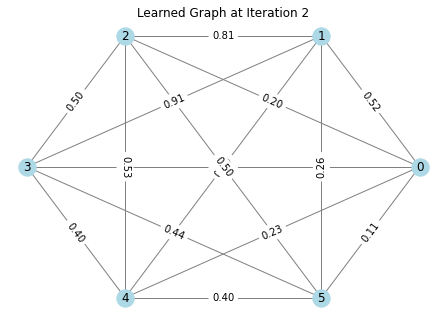

Iteration 3/5
after E-step: delta_W norm 0.0613, GLR 5.6474, adj norm^2 7.7361
after M-step-1: delta_W norm 0.0927, GLR 4.0834, adj norm^2 7.8822
PGD iter 1/50, ||S_new - S||_F = 0.0619
PGD iter 21/50, ||S_new - S||_F = 0.0573
PGD iter 41/50, ||S_new - S||_F = 0.0496
tensor([[0.0000, 0.6011, 0.5383, 0.4999, 0.2577, 0.5013],
        [0.6011, 0.0000, 0.5300, 0.2958, 0.1289, 0.5873],
        [0.5383, 0.5300, 0.0000, 0.6597, 0.6648, 0.6991],
        [0.4999, 0.2958, 0.6597, 0.0000, 1.0000, 0.6761],
        [0.2577, 0.1289, 0.6648, 1.0000, 0.0000, 0.4682],
        [0.5013, 0.5873, 0.6991, 0.6761, 0.4682, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 3 tensor(4.1312, grad_fn=<PowBackward0>)


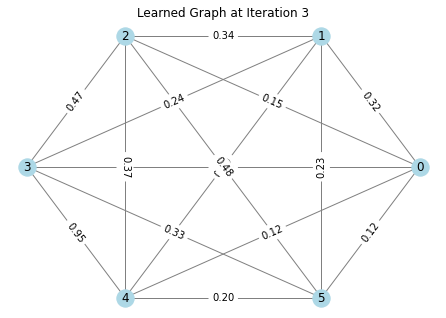

Iteration 4/5
after E-step: delta_W norm 0.0805, GLR 3.7681, adj norm^2 7.6490
after M-step-1: delta_W norm 0.1191, GLR 4.7868, adj norm^2 7.3217
PGD iter 1/50, ||S_new - S||_F = 0.0646
PGD iter 21/50, ||S_new - S||_F = 0.0596
PGD iter 41/50, ||S_new - S||_F = 0.0516
tensor([[0.0000, 0.5662, 0.5921, 0.4431, 0.4458, 0.5385],
        [0.5662, 0.0000, 0.3494, 0.8447, 0.3206, 0.4783],
        [0.5921, 0.3494, 0.0000, 0.4904, 0.3889, 0.5378],
        [0.4431, 0.8447, 0.4904, 0.0000, 0.6497, 0.4353],
        [0.4458, 0.3206, 0.3889, 0.6497, 0.0000, 0.3393],
        [0.5385, 0.4783, 0.5378, 0.4353, 0.3393, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 4 tensor(3.5385, grad_fn=<PowBackward0>)


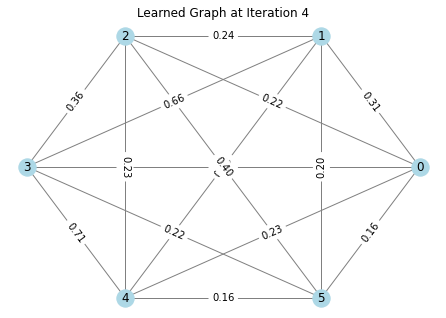

Iteration 5/5
after E-step: delta_W norm 0.1501, GLR 6.0958, adj norm^2 7.8150
after M-step-1: delta_W norm 0.0359, GLR 2.8934, adj norm^2 8.1210
PGD iter 1/50, ||S_new - S||_F = 0.0564
PGD iter 21/50, ||S_new - S||_F = 0.0523
PGD iter 41/50, ||S_new - S||_F = 0.0462
tensor([[0.0000, 0.3491, 0.5697, 0.4035, 0.5173, 0.5015],
        [0.3491, 0.0000, 0.6319, 0.3607, 0.8302, 0.6452],
        [0.5697, 0.6319, 0.0000, 0.6238, 0.4595, 0.2514],
        [0.4035, 0.3607, 0.6238, 0.0000, 1.0000, 0.7901],
        [0.5173, 0.8302, 0.4595, 1.0000, 0.0000, 0.9112],
        [0.5015, 0.6452, 0.2514, 0.7901, 0.9112, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 5 tensor(7.5720, grad_fn=<PowBackward0>)


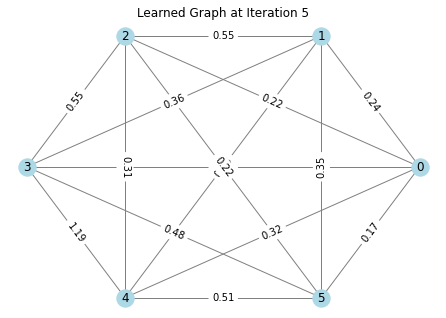

Final learned adjacency matrix:
tensor([[0.0000, 0.2390, 0.2190, 0.2152, 0.3242, 0.1675],
        [0.2390, 0.0000, 0.5545, 0.3599, 0.7755, 0.3498],
        [0.2190, 0.5545, 0.0000, 0.5488, 0.3079, 0.2171],
        [0.2152, 0.3599, 0.5488, 0.0000, 1.1869, 0.4830],
        [0.3242, 0.7755, 0.3079, 1.1869, 0.0000, 0.5055],
        [0.1675, 0.3498, 0.2171, 0.4830, 0.5055, 0.0000]],
       grad_fn=<MulBackward0>) tensor(7.5720, grad_fn=<PowBackward0>)


In [16]:
arg_dict = {
    'mu': 0.4,
    'gamma': 0.4,
    'step_size': 0.02,
    'c': 5,
    'PGD_iters': 50,
    'use_block_coordinate': False,
    'PGD_step_size': 0.02
}
Experiment(arg_dict, num_nodes, S_init=None, seed=42)

Iteration 1/5
after E-step: delta_W norm 0.1010, GLR 8.4903, adj norm^2 7.2003
after M-step-1: delta_W norm 0.1714, GLR 7.4323, adj norm^2 7.4225
PGD iter 1/50, ||S_new - S||_F = 0.0618
PGD iter 21/50, ||S_new - S||_F = 0.0568
PGD iter 41/50, ||S_new - S||_F = 0.0490
tensor([[0.0000, 0.6742, 0.5601, 0.5271, 0.3673, 0.5085],
        [0.6742, 0.0000, 0.4067, 0.3439, 0.3581, 0.4582],
        [0.5601, 0.4067, 0.0000, 0.6058, 0.6195, 0.5443],
        [0.5271, 0.3439, 0.6058, 0.0000, 0.5782, 0.6434],
        [0.3673, 0.3581, 0.6195, 0.5782, 0.0000, 0.5024],
        [0.5085, 0.4582, 0.5443, 0.6434, 0.5024, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 1 tensor(1.3364, grad_fn=<PowBackward0>)


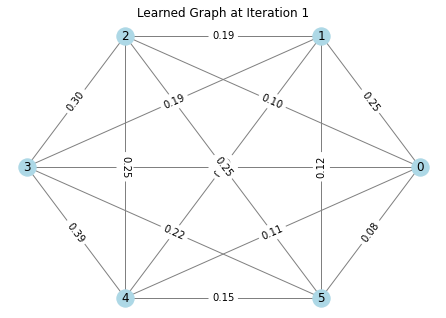

Iteration 2/5
after E-step: delta_W norm 0.1639, GLR 7.5846, adj norm^2 7.1477
after M-step-1: delta_W norm 0.0665, GLR 9.3014, adj norm^2 6.6080
PGD iter 1/50, ||S_new - S||_F = 0.0865
PGD iter 21/50, ||S_new - S||_F = 0.0792
PGD iter 41/50, ||S_new - S||_F = 0.0644
tensor([[0.0000, 0.5329, 0.5673, 0.2356, 0.0632, 0.2242],
        [0.5329, 0.0000, 0.2440, 0.1882, 0.4433, 0.0012],
        [0.5673, 0.2440, 0.0000, 0.4297, 0.3122, 0.4869],
        [0.2356, 0.1882, 0.4297, 0.0000, 0.6211, 0.2317],
        [0.0632, 0.4433, 0.3122, 0.6211, 0.0000, 0.6792],
        [0.2242, 0.0012, 0.4869, 0.2317, 0.6792, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 2 tensor(3.4552, grad_fn=<PowBackward0>)


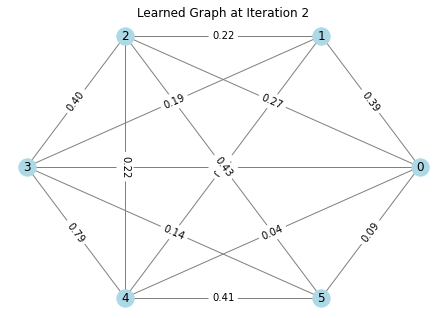

Iteration 3/5
after E-step: delta_W norm 0.0509, GLR 7.6068, adj norm^2 7.0043
after M-step-1: delta_W norm 0.1232, GLR 7.6466, adj norm^2 7.1917
PGD iter 1/50, ||S_new - S||_F = 0.1266
PGD iter 21/50, ||S_new - S||_F = 0.1126
PGD iter 41/50, ||S_new - S||_F = 0.0461
tensor([[0.0000, 0.3733, 0.4750, 0.0737, -0.0000, -0.0000],
        [0.3733, 0.0000, 0.2451, 0.0414, 0.0000, -0.0000],
        [0.4750, 0.2451, 0.0000, 0.3748, 0.4831, 0.1597],
        [0.0737, 0.0414, 0.3748, 0.0000, 0.6121, 0.6658],
        [-0.0000, 0.0000, 0.4831, 0.6121, 0.0000, 0.5027],
        [-0.0000, -0.0000, 0.1597, 0.6658, 0.5027, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 3 tensor(3.7161, grad_fn=<PowBackward0>)


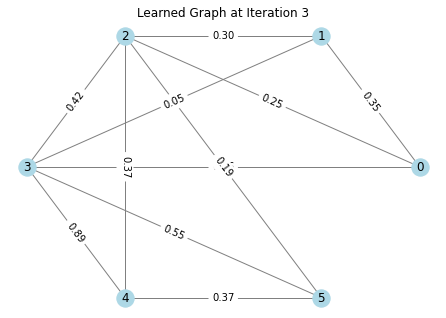

Iteration 4/5
after E-step: delta_W norm 0.1104, GLR 4.8854, adj norm^2 6.7556
after M-step-1: delta_W norm 0.1260, GLR 5.2602, adj norm^2 6.1202
PGD iter 1/50, ||S_new - S||_F = 0.1611
PGD iter 21/50, ||S_new - S||_F = 0.1256
PGD iter 41/50, ||S_new - S||_F = 0.0373
tensor([[0.0000, 0.4369, 0.3729, 0.1555, 0.0033, -0.0000],
        [0.4369, 0.0000, 0.1451, 0.0170, 0.0000, 0.0000],
        [0.3729, 0.1451, 0.0000, 0.2340, 0.0399, 0.0514],
        [0.1555, 0.0170, 0.2340, 0.0000, 0.2796, 0.6792],
        [0.0033, 0.0000, 0.0399, 0.2796, 0.0000, 0.6958],
        [-0.0000, 0.0000, 0.0514, 0.6792, 0.6958, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 4 tensor(2.6190, grad_fn=<PowBackward0>)


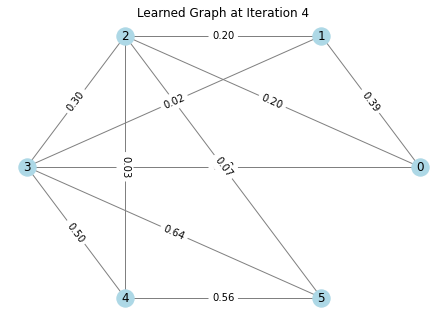

Iteration 5/5
after E-step: delta_W norm 0.1411, GLR 5.8335, adj norm^2 6.6309
after M-step-1: delta_W norm 0.0546, GLR 5.1835, adj norm^2 6.4711
PGD iter 1/50, ||S_new - S||_F = 0.1852
PGD iter 21/50, ||S_new - S||_F = 0.1361
PGD iter 41/50, ||S_new - S||_F = 0.0270
tensor([[0.0000, 0.4406, 0.4020, 0.0000, 0.0000, -0.0000],
        [0.4406, 0.0000, 0.1697, 0.0216, 0.0000, 0.0098],
        [0.4020, 0.1697, 0.0000, 0.3946, -0.0000, -0.0000],
        [0.0000, 0.0216, 0.3946, 0.0000, 0.9724, 0.6320],
        [0.0000, 0.0000, -0.0000, 0.9724, 0.0000, 0.3877],
        [-0.0000, 0.0098, -0.0000, 0.6320, 0.3877, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 5 tensor(14.0430, grad_fn=<PowBackward0>)


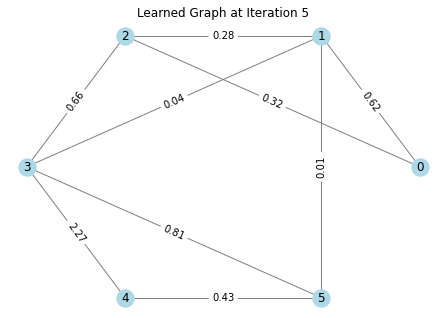

Final learned adjacency matrix:
tensor([[0.0000, 0.6190, 0.3203, 0.0000, 0.0000, -0.0000],
        [0.6190, 0.0000, 0.2823, 0.0370, 0.0000, 0.0102],
        [0.3203, 0.2823, 0.0000, 0.6582, -0.0000, -0.0000],
        [0.0000, 0.0370, 0.6582, 0.0000, 2.2749, 0.8144],
        [0.0000, 0.0000, -0.0000, 2.2749, 0.0000, 0.4278],
        [-0.0000, 0.0102, -0.0000, 0.8144, 0.4278, 0.0000]],
       grad_fn=<MulBackward0>) tensor(14.0430, grad_fn=<PowBackward0>)


In [19]:
arg_dict = {
    'mu': 0.2,
    'gamma': 0.4,
    'step_size': 0.02,
    'c': 5,
    'PGD_iters': 50,
    'use_block_coordinate': False,
    'PGD_step_size': 0.02
}
Experiment(arg_dict, num_nodes, S_init=None, seed=42)

Iteration 1/5
after E-step: delta_W norm 0.1010, GLR 8.4903, adj norm^2 7.2003
after M-step-1: delta_W norm 0.3467, GLR 7.6434, adj norm^2 7.4622
Block Coordinate PGD iter 1/50, ||S_new - S||_F = 0.0776
Block Coordinate PGD iter 21/50, ||S_new - S||_F = 0.0274
Block Coordinate PGD iter 41/50, ||S_new - S||_F = 0.0070
tensor([[0.0000, 1.0000, 0.8669, 0.8990, 0.7424, 0.8376],
        [1.0000, 0.0000, 0.6746, 0.5289, 0.5888, 0.8061],
        [0.8669, 0.6746, 0.0000, 0.7472, 0.8058, 0.8137],
        [0.8990, 0.5289, 0.7472, 0.0000, 0.7159, 0.9407],
        [0.7424, 0.5888, 0.8058, 0.7159, 0.0000, 0.7337],
        [0.8376, 0.8061, 0.8137, 0.9407, 0.7337, 0.0000]],
       grad_fn=<IndexPutBackward0>)
W norm^2 at Iteration 1 tensor(2.6877, grad_fn=<PowBackward0>)


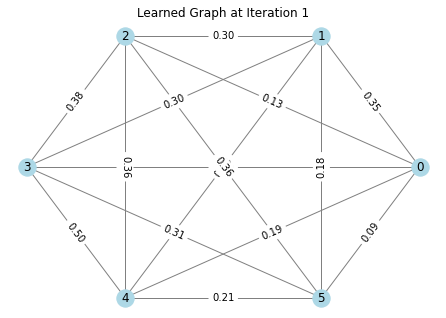

Iteration 2/5
after E-step: delta_W norm 0.3640, GLR 8.1748, adj norm^2 7.1757
after M-step-1: delta_W norm 0.3003, GLR 7.5153, adj norm^2 4.4457
Block Coordinate PGD iter 1/50, ||S_new - S||_F = 0.0957
Block Coordinate PGD iter 21/50, ||S_new - S||_F = 0.0473
Block Coordinate PGD iter 41/50, ||S_new - S||_F = 0.0086
tensor([[0.0000, 0.8695, 0.9856, 0.5197, 0.5843, 0.7782],
        [0.8695, 0.0000, 1.0000, 0.3431, 0.4785, 0.4855],
        [0.9856, 1.0000, 0.0000, 0.6463, 0.7151, 0.7761],
        [0.5197, 0.3431, 0.6463, 0.0000, 1.0000, 1.0000],
        [0.5843, 0.4785, 0.7151, 1.0000, 0.0000, 0.5964],
        [0.7782, 0.4855, 0.7761, 1.0000, 0.5964, 0.0000]],
       grad_fn=<IndexPutBackward0>)
W norm^2 at Iteration 2 tensor(5.5765, grad_fn=<PowBackward0>)


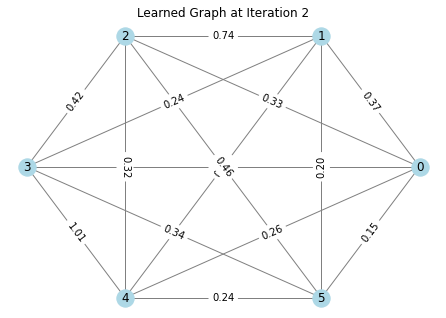

Iteration 3/5
after E-step: delta_W norm 0.2987, GLR 7.0235, adj norm^2 7.0236
after M-step-1: delta_W norm 0.2132, GLR 6.8476, adj norm^2 4.6130
Block Coordinate PGD iter 1/50, ||S_new - S||_F = 0.1119
Block Coordinate PGD iter 21/50, ||S_new - S||_F = 0.0350
Block Coordinate PGD iter 41/50, ||S_new - S||_F = 0.0088
tensor([[0.0000, 0.7376, 0.7757, 0.5804, 0.7637, 0.7489],
        [0.7376, 0.0000, 0.7831, 0.6268, 0.3134, 0.6618],
        [0.7757, 0.7831, 0.0000, 0.8245, 0.5128, 0.5030],
        [0.5804, 0.6268, 0.8245, 0.0000, 1.0000, 0.9296],
        [0.7637, 0.3134, 0.5128, 1.0000, 0.0000, 0.8136],
        [0.7489, 0.6618, 0.5030, 0.9296, 0.8136, 0.0000]],
       grad_fn=<IndexPutBackward0>)
W norm^2 at Iteration 3 tensor(4.7628, grad_fn=<PowBackward0>)


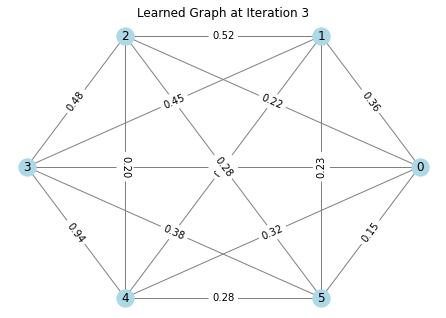

Iteration 4/5
after E-step: delta_W norm 0.2118, GLR 8.6919, adj norm^2 7.0535
after M-step-1: delta_W norm 0.2667, GLR 7.8892, adj norm^2 9.0857
Block Coordinate PGD iter 1/50, ||S_new - S||_F = 0.1000
Block Coordinate PGD iter 21/50, ||S_new - S||_F = 0.0489
Block Coordinate PGD iter 41/50, ||S_new - S||_F = 0.0129
tensor([[0.0000, 0.7792, 1.0000, 0.5470, 0.6406, 0.8201],
        [0.7792, 0.0000, 0.8847, 0.6277, 0.5668, 0.3469],
        [1.0000, 0.8847, 0.0000, 0.6674, 0.5913, 0.4745],
        [0.5470, 0.6277, 0.6674, 0.0000, 0.3157, 0.9196],
        [0.6406, 0.5668, 0.5913, 0.3157, 0.0000, 1.0000],
        [0.8201, 0.3469, 0.4745, 0.9196, 1.0000, 0.0000]],
       grad_fn=<IndexPutBackward0>)
W norm^2 at Iteration 4 tensor(3.8926, grad_fn=<PowBackward0>)


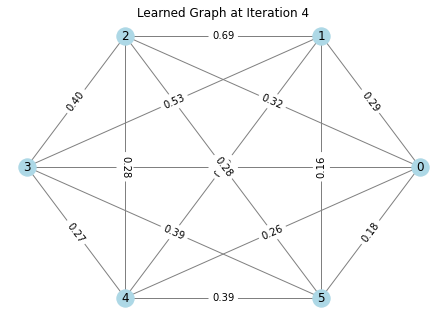

Iteration 5/5
after E-step: delta_W norm 0.3117, GLR 8.8948, adj norm^2 7.1089
after M-step-1: delta_W norm 0.5813, GLR 7.4496, adj norm^2 4.6165
Block Coordinate PGD iter 1/50, ||S_new - S||_F = 0.0999
Block Coordinate PGD iter 21/50, ||S_new - S||_F = 0.0451
Block Coordinate PGD iter 41/50, ||S_new - S||_F = 0.0095
tensor([[0.0000, 0.7018, 0.7826, 0.5144, 0.5483, 0.6307],
        [0.7018, 0.0000, 0.8908, 0.7704, 0.6556, 0.3890],
        [0.7826, 0.8908, 0.0000, 0.6138, 0.7147, 0.5644],
        [0.5144, 0.7704, 0.6138, 0.0000, 0.7054, 1.0000],
        [0.5483, 0.6556, 0.7147, 0.7054, 0.0000, 0.6821],
        [0.6307, 0.3890, 0.5644, 1.0000, 0.6821, 0.0000]],
       grad_fn=<IndexPutBackward0>)
W norm^2 at Iteration 5 tensor(5.1453, grad_fn=<PowBackward0>)


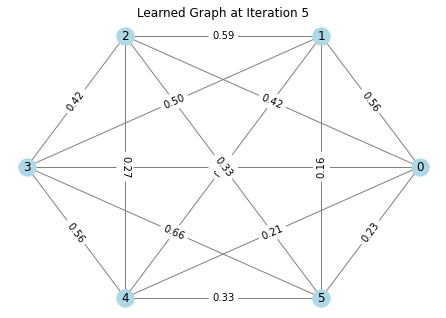

Final learned adjacency matrix:
tensor([[0.0000, 0.5564, 0.4225, 0.2839, 0.2074, 0.2342],
        [0.5564, 0.0000, 0.5900, 0.5037, 0.2656, 0.1582],
        [0.4225, 0.5900, 0.0000, 0.4234, 0.2709, 0.3283],
        [0.2839, 0.5037, 0.4234, 0.0000, 0.5556, 0.6553],
        [0.2074, 0.2656, 0.2709, 0.5556, 0.0000, 0.3317],
        [0.2342, 0.1582, 0.3283, 0.6553, 0.3317, 0.0000]],
       grad_fn=<MulBackward0>) tensor(5.1453, grad_fn=<PowBackward0>)


In [45]:
arg_dict = {
    'mu': 0.2,
    'gamma': 0.2,
    'step_size': 0.04,
    'c': 5,
    'PGD_iters': 50,
    'use_block_coordinate': True,
    'PGD_step_size': 0.04
}
Experiment(arg_dict, num_nodes, S_init=None, seed=42)